In [132]:
#Load Prereq Libraries
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [133]:
#Import csv file
data = pd.read_csv('Resources/Protests.csv')
data.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/MHOXDV,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,campaign,participants as % population,Success?,MAX of participants,ID,Year of max involvement,First year of campaign,Last year of camapaign,Location,Pop in that year,greater than 3.5% of pop involved?,Problem?
1,Singing Revolution,128.85%,TRUE,"2,000,000",202,1987,1987,1991,Estonia,"1,552,221",TRUE,chill
2,Aruba Pro-Independence Campaign,99.39%,FALSE,"60,000",254,1977,1977,1977,Aruba,"60,366",TRUE,PROBLEM
3,Latvia pro-dem movement,74.99%,TRUE,"2,000,000",127,1989,1989,1991,Latvia,"2,666,955",TRUE,chill
4,Uruguay Anti-Military,66.84%,TRUE,"2,000,001",239,1984,1984,1985,Uruguay,"2,992,246",TRUE,chill


In [134]:
protest_data_df = data.rename(columns={"Unnamed: 0" : 'campaign', 'Unnamed: 1' : 'participants as % population', 'Unnamed: 2' : 'Success',
                                       'https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/MHOXDV' : 'MAX of participants',
                                       'Unnamed: 4' : 'ID', 'Unnamed: 5' : 'Year of max involvement', 'Unnamed: 6' : 'First year of campaign',
                                        'Unnamed: 7' : 'Last year of campaign', 'Unnamed: 8' : 'Location', 'Unnamed: 9' : 'Pop in that year',
                                        'Unnamed: 10' : 'greater than 3.5% of pop involved?', 'Unnamed: 11' : 'Problem?'})
protest_data_df.head()


,campaign,participants as % population,Success,MAX of participants,ID,Year of max involvement,First year of campaign,Last year of campaign,Location,Pop in that year,greater than 3.5% of pop involved?,Problem?
0,campaign,participants as % population,Success?,MAX of participants,ID,Year of max involvement,First year of campaign,Last year of camapaign,Location,Pop in that year,greater than 3.5% of pop involved?,Problem?
1,Singing Revolution,128.85%,TRUE,"2,000,000",202,1987,1987,1991,Estonia,"1,552,221",TRUE,chill
2,Aruba Pro-Independence Campaign,99.39%,FALSE,"60,000",254,1977,1977,1977,Aruba,"60,366",TRUE,PROBLEM
3,Latvia pro-dem movement,74.99%,TRUE,"2,000,000",127,1989,1989,1991,Latvia,"2,666,955",TRUE,chill
4,Uruguay Anti-Military,66.84%,TRUE,"2,000,001",239,1984,1984,1985,Uruguay,"2,992,246",TRUE,chill


In [135]:
#Delete first row that's duplicating the column headers
protest_data_df.drop(protest_data_df.index[0], inplace=True)


protest_data_df.head()

,campaign,participants as % population,Success,MAX of participants,ID,Year of max involvement,First year of campaign,Last year of campaign,Location,Pop in that year,greater than 3.5% of pop involved?,Problem?
1,Singing Revolution,128.85%,TRUE,"2,000,000",202,1987,1987,1991,Estonia,"1,552,221",TRUE,chill
2,Aruba Pro-Independence Campaign,99.39%,FALSE,"60,000",254,1977,1977,1977,Aruba,"60,366",TRUE,PROBLEM
3,Latvia pro-dem movement,74.99%,TRUE,"2,000,000",127,1989,1989,1991,Latvia,"2,666,955",TRUE,chill
4,Uruguay Anti-Military,66.84%,TRUE,"2,000,001",239,1984,1984,1985,Uruguay,"2,992,246",TRUE,chill
5,Czech Anti-Soviet Occupation,35.52%,FALSE,"3,500,000",64,1967,1967,1968,Czechoslovakia,"9,852,899",TRUE,PROBLEM


In [136]:
#Create new df with only the columns we need
trim_protest_data_df = protest_data_df[['campaign', 'participants as % population', 'Success', 'First year of campaign', 'Last year of campaign', 'Location', 'Pop in that year', 'greater than 3.5% of pop involved?']]


In [137]:
#Describe the data
trim_protest_data_df.describe()


,campaign,participants as % population,Success,First year of campaign,Last year of campaign,Location,Pop in that year,greater than 3.5% of pop involved?
count,299,299,299,299,299,299,299,299
unique,299,155,2,52,52,123,290,2
top,Singing Revolution,0.00%,FALSE,1991,2013,Pakistan,"88,404,640",FALSE
freq,1,18,180,16,55,11,3,261


In [138]:
trim_protest_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 1 to 299
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   campaign                            299 non-null    object
 1   participants as % population        299 non-null    object
 2   Success                             299 non-null    object
 3   First year of campaign              299 non-null    object
 4   Last year of campaign               299 non-null    object
 5   Location                            299 non-null    object
 6   Pop in that year                    299 non-null    object
 7   greater than 3.5% of pop involved?  299 non-null    object
dtypes: object(8)
memory usage: 18.8+ KB


In [139]:
#Check how many counts are in the Success column
trim_protest_data_df['Success'].value_counts()

Success
FALSE    180
TRUE     119
Name: count, dtype: int64

In [140]:
#Check value on participants as % population
trim_protest_data_df['participants as % population'].value_counts()


participants as % population
0.00%    18
0.02%    14
0.01%    11
0.03%     9
0.05%     9
         ..
2.05%     1
2.03%     1
1.99%     1
1.97%     1
1.18%     1
Name: count, Length: 155, dtype: int64

In [141]:
# Check if all values in the pop in that year column are integers
are_all_integers = trim_protest_data_df['Pop in that year'].apply(lambda x: isinstance(x, int)).all()

if are_all_integers:
    print("All values in the 'numbers' column are integers.")
else:
    print("Not all values in the 'numbers' column are integers.")

Not all values in the 'numbers' column are integers.


In [142]:
#Take out the commas in the 'Pop in that year' column
trim_protest_data_df['Pop in that year'] = trim_protest_data_df['Pop in that year'].str.replace(',', '')

C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\3164770781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['Pop in that year'] = trim_protest_data_df['Pop in that year'].str.replace(',', '')


In [143]:
# Convert the 'Pop in that year' column to integers
can_convert_to_int = trim_protest_data_df['Pop in that year'].apply(lambda x: x.isdigit()).all()

if can_convert_to_int:
    print("All values in the 'numbers' column can be converted to integers.")
else:
    print("Not all values in the 'numbers' column can be converted to integers.")

All values in the 'numbers' column can be converted to integers.


In [144]:
trim_protest_data_df['Pop in that year'] = trim_protest_data_df['Pop in that year'].astype(int)


C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\957814049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['Pop in that year'] = trim_protest_data_df['Pop in that year'].astype(int)


In [145]:
#Check if all values in the 'Pop in that year' column are integers
are_all_integers = trim_protest_data_df['Pop in that year'].apply(lambda x: isinstance(x, int)).all()

if are_all_integers:
    print("All values in the 'numbers' column are integers.")
else:
    print("Not all values in the 'numbers' column are integers.")

All values in the 'numbers' column are integers.


In [146]:
#Remove the % sign from the 'participants as % population' column
trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].str.replace('%', '')

#Remove the . from the 'participants as % population' column
trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].str.replace('.', '')


C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\3345502905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].str.replace('%', '')
C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\3345502905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].str.replace('.', '')


In [147]:
#Check if all values in the 'participants as % population' column can be converted to floats
can_convert_to_float = trim_protest_data_df['participants as % population'].apply(lambda x: x.replace('.', '', 1).isdigit()).all()

if can_convert_to_float:
    print("All values in the 'participants as % population' column can be converted to floats.")
else:
    print("Not all values in the 'participants as % population' column can be converted to floats.")

All values in the 'participants as % population' column can be converted to floats.


In [148]:
trim_protest_data_df['parparticipants as % population'] = trim_protest_data_df['participants as % population'].astype(float)

C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\1117732309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['parparticipants as % population'] = trim_protest_data_df['participants as % population'].astype(float)


In [149]:
#Check if all values in the 'participants as % population' column are floats
are_all_floats = trim_protest_data_df['participants as % population'].apply(lambda x: isinstance(x, float)).all()

if are_all_floats:
    print("All values in the 'participants as % population' column are floats.")
else:
    print("Not all values in the 'participants as % population' column are floats.")

Not all values in the 'participants as % population' column are floats.


In [150]:
#Check all value types in participants as % population column
trim_protest_data_df['participants as % population'].apply(type).value_counts()

participants as % population
<class 'str'>    299
Name: count, dtype: int64

In [151]:
# Remove non-numeric characters (like '%' and ',') and convert to float
trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].str.replace('%', '').str.replace(',', '.')

# Convert to float
trim_protest_data_df['participants as % population'] = pd.to_numeric(trim_protest_data_df['participants as % population'], errors='coerce')

print(trim_protest_data_df)

                            campaign  participants as % population Success  \
1                 Singing Revolution                         12885    TRUE   
2    Aruba Pro-Independence Campaign                          9939   FALSE   
3            Latvia pro-dem movement                          7499    TRUE   
4              Uruguay Anti-Military                          6684    TRUE   
5       Czech Anti-Soviet Occupation                          3552   FALSE   
..                               ...                           ...     ...   
295               Naxalite rebellion                             0   FALSE   
296      Assam Independence Campaign                             0   FALSE   
297   Bodoland Independence Campaign                             0   FALSE   
298             Tripuri nationalists                             0   FALSE   
299                       Boko Haram                             0   FALSE   

    First year of campaign Last year of campaign        Locatio

C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\235010656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].str.replace('%', '').str.replace(',', '.')
C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\235010656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['participants as % population'] = pd.to_numeric(trim_protest_data_df['participants as % population'], errors='coerce

In [152]:
#Check if all values in the 'participants as % population' column are floats
are_all_floats = trim_protest_data_df['participants as % population'].apply(lambda x: isinstance(x, float)).all()

if are_all_floats:
    print("All values in the 'participants as % population' column are floats.")
else:
    print("Not all values in the 'participants as % population' column are floats.")

#Convert the 'participants as % population' column to floats
trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].astype(float)


Not all values in the 'participants as % population' column are floats.


C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\688605258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'].astype(float)


In [153]:
#Check if all values in the 'participants as % population' column are floats
are_all_floats = trim_protest_data_df['participants as % population'].apply(lambda x: isinstance(x, float)).all()

if are_all_floats:
    print("All values in the 'participants as % population' column are floats.")
else:
    print("Not all values in the 'participants as % population' column are floats.")


All values in the 'participants as % population' column are floats.


In [154]:
#Move decimal point two places to the left
trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'] / 100

C:\Users\Cajun\AppData\Local\Temp\ipykernel_32852\1831367179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trim_protest_data_df['participants as % population'] = trim_protest_data_df['participants as % population'] / 100


In [155]:
trim_protest_data_df = trim_protest_data_df.drop(columns=['parparticipants as % population'])

In [156]:
trim_protest_data_df['First year of campaign'] = trim_protest_data_df['First year of campaign'].astype(int)
trim_protest_data_df['Last year of campaign'] = trim_protest_data_df['Last year of campaign'].astype(int)

In [157]:
#Check if all values in the 'First year of campaign' column are integers
are_all_integers = trim_protest_data_df['First year of campaign'].apply(lambda x: isinstance(x, int)).all()

if are_all_integers:
    print("All values in the 'First year of campaign' column are integers.")
else:
    print("Not all values in the 'First year of campaign' column are integers.")

All values in the 'First year of campaign' column are integers.


In [158]:
#Check if all values in the 'Last year of campaign' column are integers
are_all_integers = trim_protest_data_df['Last year of campaign'].apply(lambda x: isinstance(x, int)).all()

if are_all_integers:
    print("All values in the 'Last year of campaign' column are integers.")
else:
    print("Not all values in the 'Last year of campaign' column are integers.")

All values in the 'Last year of campaign' column are integers.


In [159]:
#Create a new column that calculates the duration of the campaign
trim_protest_data_df['Campaign Duration'] = trim_protest_data_df['Last year of campaign'] - trim_protest_data_df['First year of campaign']
trim_protest_data_df.head()

,campaign,participants as % population,Success,First year of campaign,Last year of campaign,Location,Pop in that year,greater than 3.5% of pop involved?,Campaign Duration
1,Singing Revolution,128.85,TRUE,1987,1991,Estonia,1552221,TRUE,4
2,Aruba Pro-Independence Campaign,99.39,FALSE,1977,1977,Aruba,60366,TRUE,0
3,Latvia pro-dem movement,74.99,TRUE,1989,1991,Latvia,2666955,TRUE,2
4,Uruguay Anti-Military,66.84,TRUE,1984,1985,Uruguay,2992246,TRUE,1
5,Czech Anti-Soviet Occupation,35.52,FALSE,1967,1968,Czechoslovakia,9852899,TRUE,1


In [160]:
# Function to move a column to the left by a specified number of positions
def move_column(trim_protest_data_df, column_name, positions):
    cols = trim_protest_data_df.columns.tolist()
    current_index = cols.index(column_name)
    new_index = max(0, current_index - positions)  # Ensure the new index is not negative
    cols.insert(new_index, cols.pop(current_index))
    return trim_protest_data_df[cols]


In [161]:
trim_protest_data_df = move_column(trim_protest_data_df, 'Campaign Duration', 3)
trim_protest_data_df.head()

,campaign,participants as % population,Success,First year of campaign,Last year of campaign,Campaign Duration,Location,Pop in that year,greater than 3.5% of pop involved?
1,Singing Revolution,128.85,TRUE,1987,1991,4,Estonia,1552221,TRUE
2,Aruba Pro-Independence Campaign,99.39,FALSE,1977,1977,0,Aruba,60366,TRUE
3,Latvia pro-dem movement,74.99,TRUE,1989,1991,2,Latvia,2666955,TRUE
4,Uruguay Anti-Military,66.84,TRUE,1984,1985,1,Uruguay,2992246,TRUE
5,Czech Anti-Soviet Occupation,35.52,FALSE,1967,1968,1,Czechoslovakia,9852899,TRUE


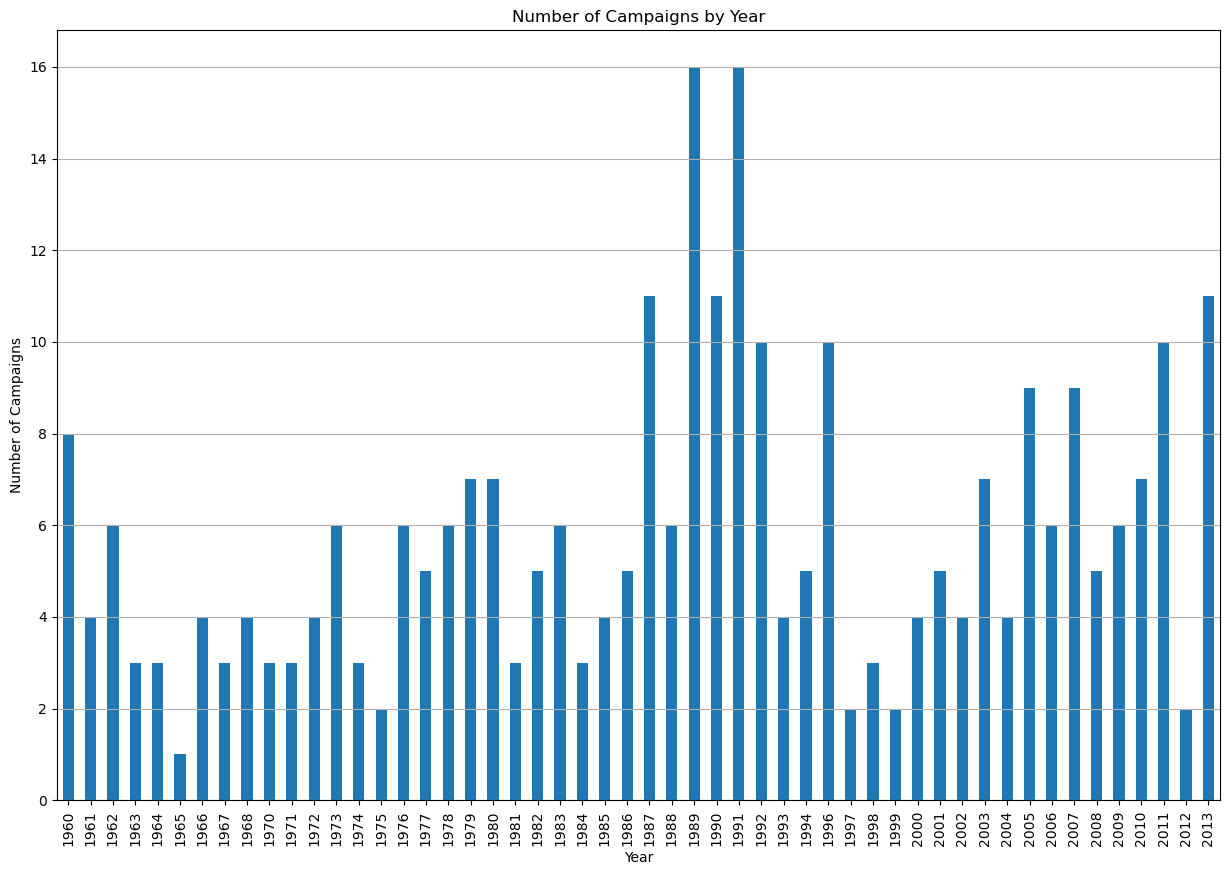

In [162]:
#Bar chart of the number of campaigns by year
campaigns_by_year = trim_protest_data_df['First year of campaign'].value_counts().sort_index()
campaigns_by_year.plot(kind='bar', figsize=(15, 10))
plt.title('Number of Campaigns by Year')
plt.xlabel('Year')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y')
plt.show()


In [168]:
#Get list of unique locations
locations = trim_protest_data_df['Location'].unique()
locations




array(['Estonia', 'Aruba', 'Latvia', 'Uruguay', 'Czechoslovakia',
       'Argentina', 'Zambia', 'Panama', 'Lebanon', 'East Timor', 'Poland',
       'Comoros', 'Bolivia', 'South Africa', 'Lithuania',
       'Democratic Republic of Congo', 'Bahrain', 'Sudan', 'Portugal',
       'Albania', 'Yemen', 'Iran', 'Chile', 'Honduras', 'Madagascar',
       'Nepal', 'Maldives', 'Tonga', 'Pakistan', 'Brunei',
       'Yemen Arab Republic', 'Philippines', 'Serbia', 'Cambodia',
       'Nigeria', 'China', 'Togo', 'Egypt', 'Fiji', 'Mauritania',
       'South Korea', 'Algeria', 'Djibouti', 'Bosnia-Herzegovina',
       'Greece', 'Iceland', 'Afghanistan', 'Georgia', 'Ukraine', 'Jordan',
       'Belarus', 'Romania', 'Tunisia', 'Mongolia', 'Guinea-Bissau',
       'Liberia', 'Namibia', 'Brazil', 'Haiti', 'Slovakia', 'Syria',
       'Mali', 'Central African Republic', 'France', 'Sierra Leone',
       'Mexico', 'Iraq', 'Slovenia', 'Thailand', 'Guinea', 'Kyrgyzstan',
       'Hungary', 'Peru', 'Angola', 'Bulgaria'

In [169]:
#List the locations in North America
north_american_countries = ['United States', 'Canada', 'Mexico', 'Greenland', 'Bermuda', 'Saint Pierre and Miquelon']
north_american_countries

#List the locations in South America
south_american_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
south_american_countries

#List the locations in Europe
european_countries = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']
european_countries

['United States',
 'Canada',
 'Mexico',
 'Greenland',
 'Bermuda',
 'Saint Pierre and Miquelon']

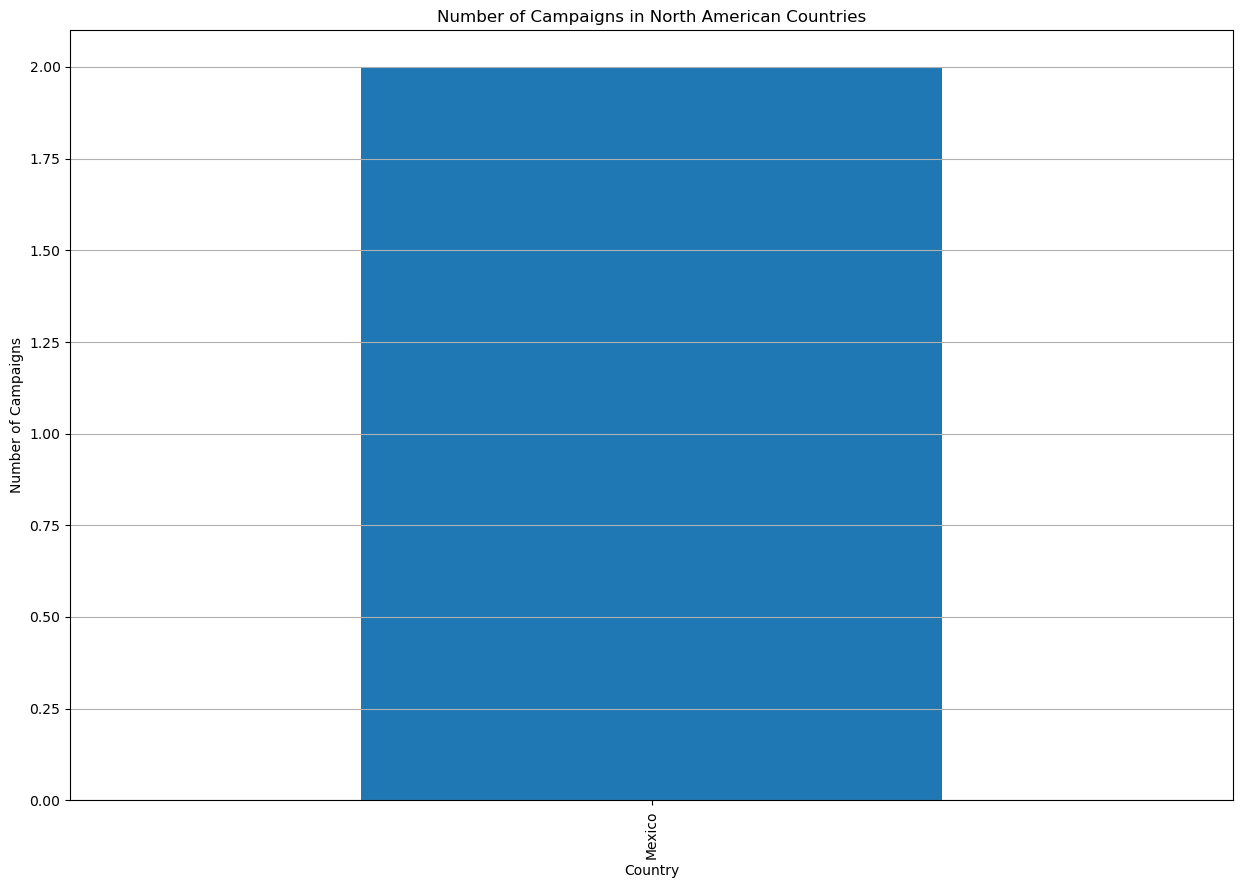

In [176]:
#Make a chart of the number of campaigns for North American countries. Have countries on the x-axis and number of campaigns on the y-axis
north_american_campaigns = trim_protest_data_df[trim_protest_data_df['Location'].isin(north_american_countries)]
north_american_campaigns = north_american_campaigns['Location'].value_counts()
north_american_campaigns.plot(kind='bar', figsize=(15, 10))
plt.title('Number of Campaigns in North American Countries')
plt.xlabel('Country')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y')
plt.show()





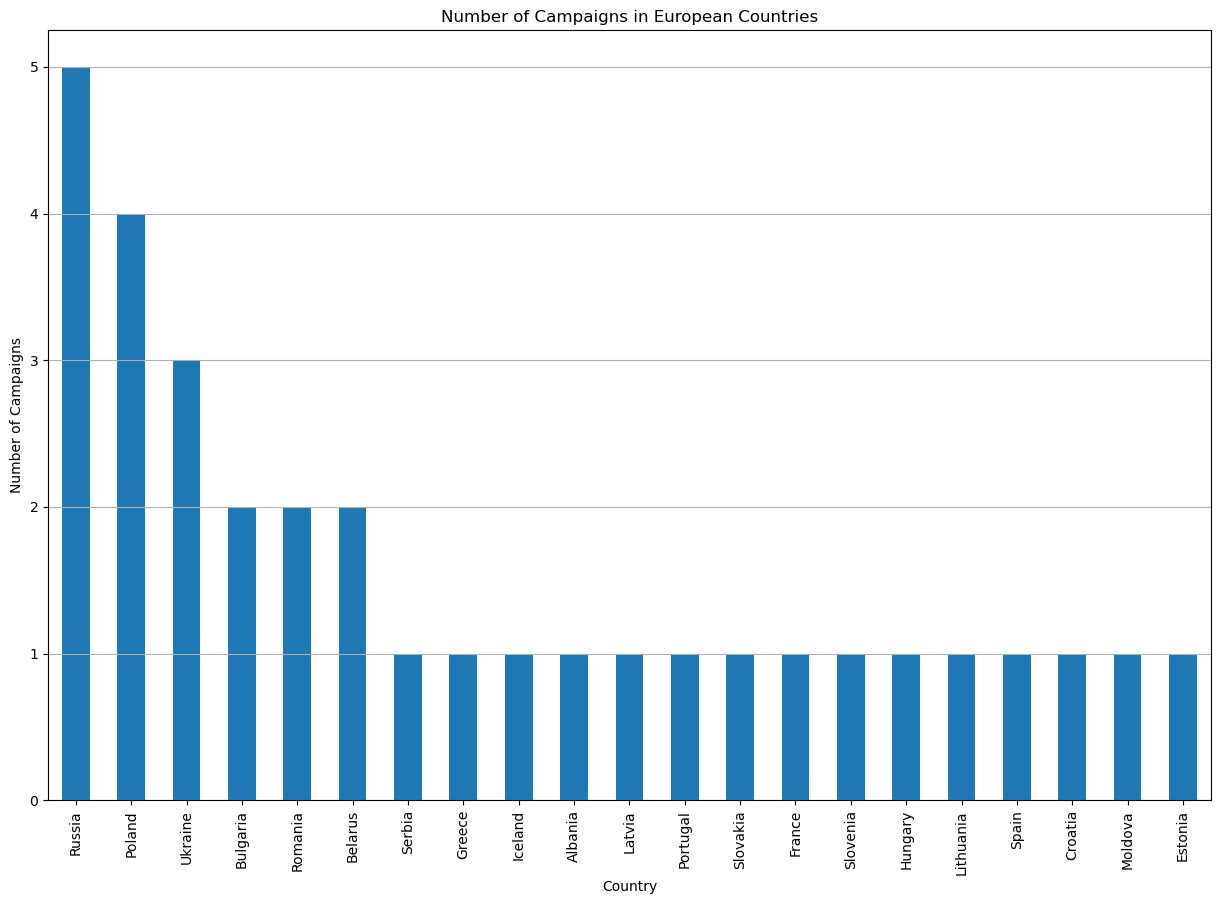

In [178]:
#Make a chart of the number of campaigns for European countries. Have countries on the x-axis and number of campaigns on the y-axis
european_campaigns = trim_protest_data_df[trim_protest_data_df['Location'].isin(european_countries)]
european_campaigns = european_campaigns['Location'].value_counts()
european_campaigns.plot(kind='bar', figsize=(15, 10))
plt.title('Number of Campaigns in European Countries')
plt.xlabel('Country')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y')
plt.show()


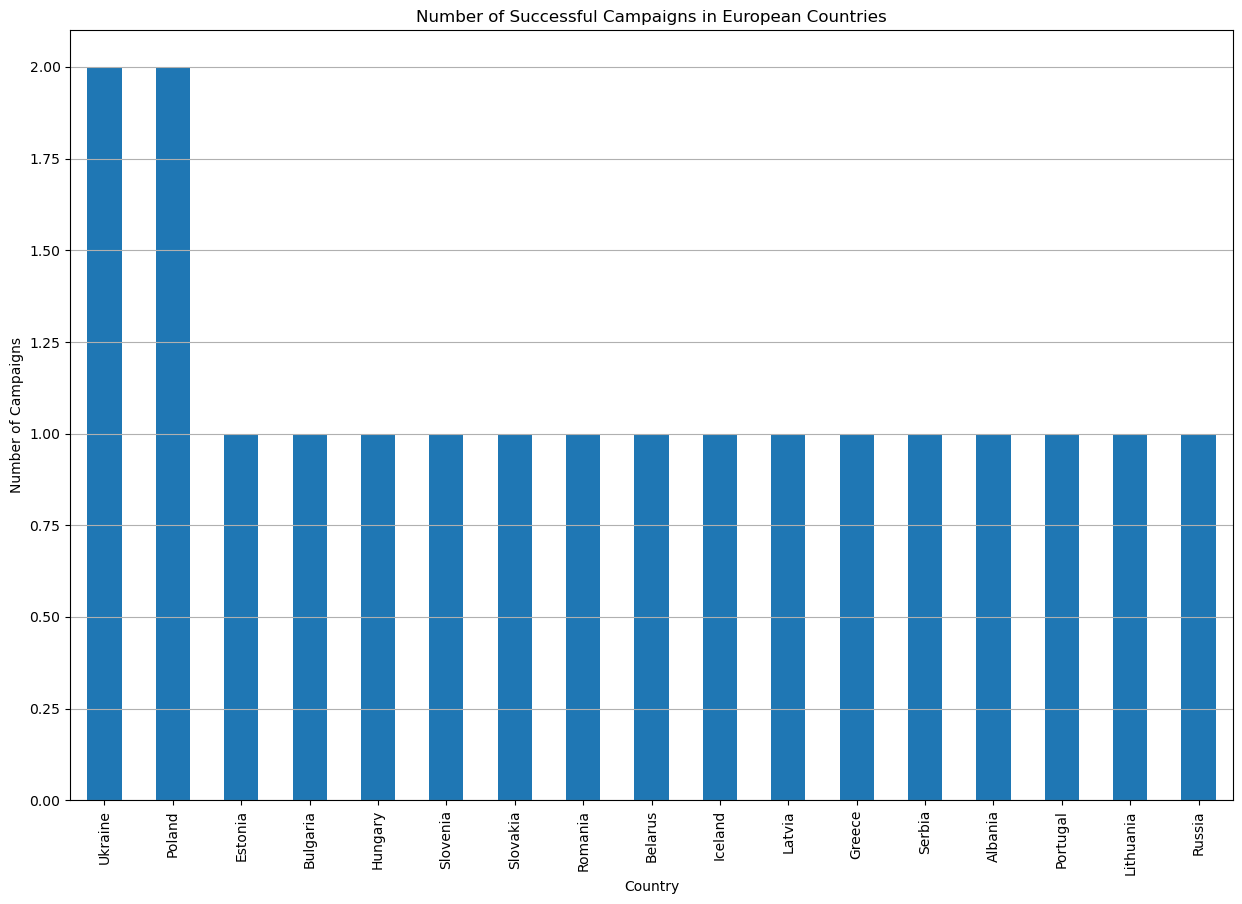

In [181]:
#Make a chart displaying the number of successful campaigns in Europe
european_campaigns = trim_protest_data_df[trim_protest_data_df['Location'].isin(european_countries)]
european_campaigns = european_campaigns[european_campaigns['Success'] == 'TRUE']
european_campaigns = european_campaigns['Location'].value_counts()
european_campaigns.plot(kind='bar', figsize=(15, 10))
plt.title('Number of Successful Campaigns in European Countries')
plt.xlabel('Country')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y')
plt.show()

